<a href="https://colab.research.google.com/github/mahidher/EDA-BikeSharingDataset/blob/master/EDA_Bike_Sharing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement- Bike-sharing system are meant to rent the bicycle and return to the different place for the bike sharing purpose in Washington DC. You are provided with rental data spanning for 2 years. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.



```
Data Fields
datetime - hourly date + timestamp  
season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
holiday - whether the day is considered a holiday
workingday - whether the day is neither a weekend nor holiday
weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
temp - temperature in Celsius
atemp - "feels like" temperature in Celsius
humidity - relative humidity
windspeed - wind speed
casual - number of non-registered user rentals initiated
registered - number of registered user rentals initiated
count - number of total rentals

```



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
train = pd.read_csv("train.csv")

In [4]:
test = pd.read_csv("test.csv")

In [5]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
train.columns[1:-1]

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered'],
      dtype='object')

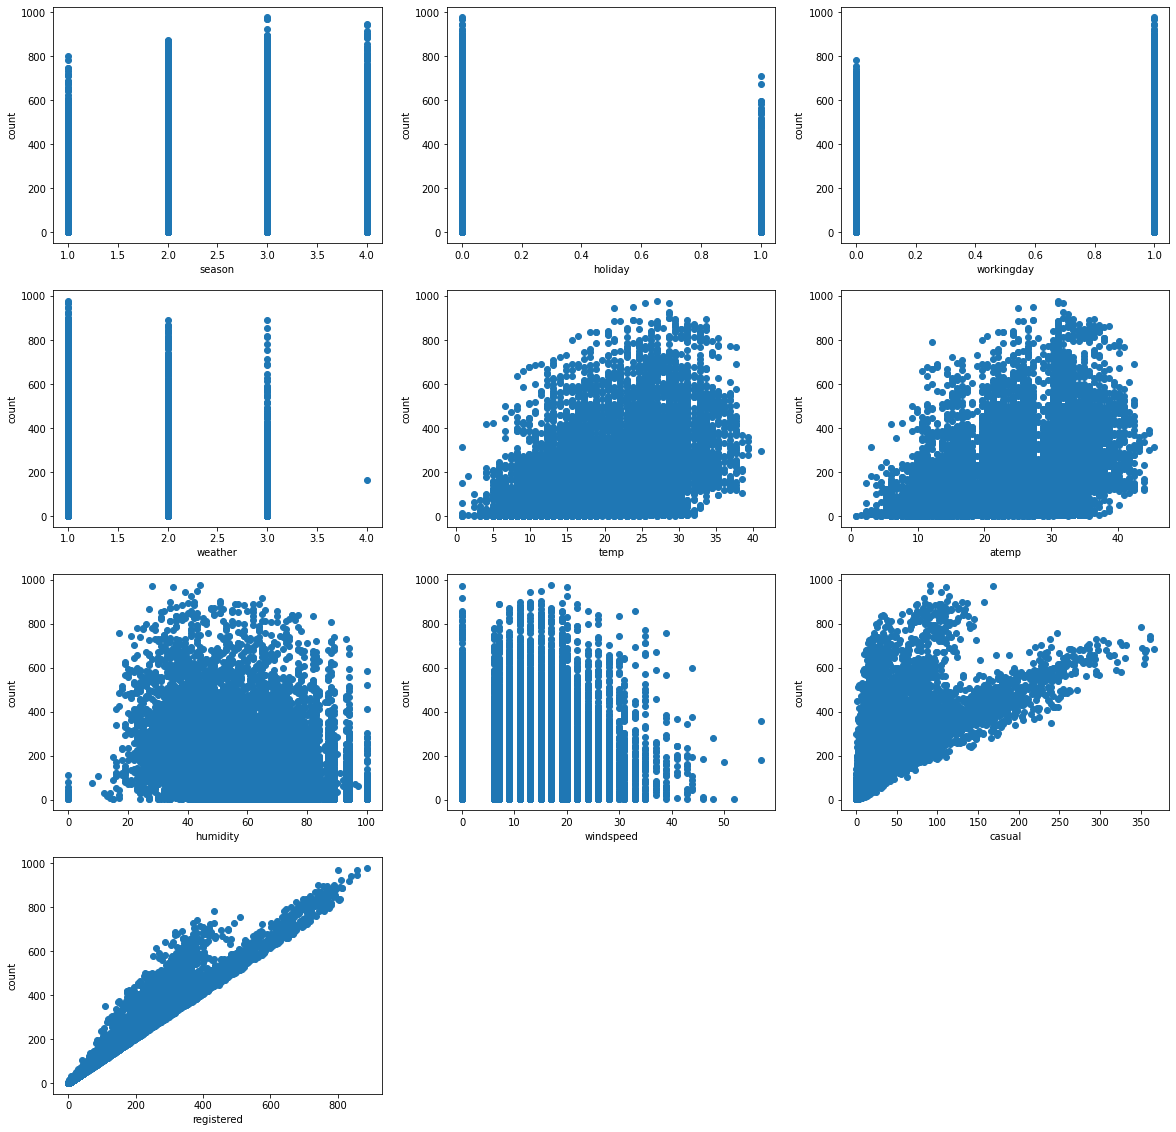

In [8]:
plt.figure(figsize=(20,20))
counter=1
for col in train.columns[1:-1]:
  plt.subplot(4,3,counter)
  plt.scatter(train[col],train["count"])
  plt.xlabel(col)
  plt.ylabel("count")
  counter+=1

Registered users count + casual user count = total count(also reason why they have a linear relationship)


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [10]:
train[(train["holiday"]==1 )& (train["workingday"]==1)]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


both holiday and working day can not be 1 but they both can be 0 which means weekend


In [11]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [12]:
!pip install pandas-profiling

In [13]:
import pandas_profiling as pp

In [14]:
pp.ProfileReport(train.iloc[:,:-1])

TypeError: ignored

things i learnt is:

1.   atemp and temp have very high correlation
2.   we have very less data which has holiday =1 so wen we do splitting we need to stratify based on this column


In [15]:
train.isnull().any()

datetime      False
season        False
holiday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
casual        False
registered    False
count         False
dtype: bool

Lets find out how the count varies with each hour of the day

In [16]:
train.datetime = pd.to_datetime(train.datetime)

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [18]:
year= 2011
data = train[train.datetime.dt.year == year]
data["hour"] = data.datetime.dt.hour

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [20]:
x = data.groupby("hour").sum()
x.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
hour,,,,,,,,,,,
0,569,6,155,312,4185.28,4971.995,15878,2393.0993,2176,7713,9889
1,566,6,154,323,4088.52,4846.215,16054,2379.0561,1304,4760,6064
2,561,6,150,309,3964.70,4712.880,15981,2185.0844,1029,3238,4267
3,547,6,139,292,3816.28,4534.105,15588,2174.0294,588,1534,2122
4,557,6,143,299,3823.66,4542.425,16199,2330.0791,262,868,1130


In [21]:
by_hour = data.groupby(['hour', 'workingday'])['count'].agg("sum").unstack()
by_hour

workingday,0,1
hour,,
0,5397,4492
1,4062,2002
2,3160,1107
3,1523,599
4,490,640
5,521,2731
6,1077,11980
7,2555,33109
8,5854,54295


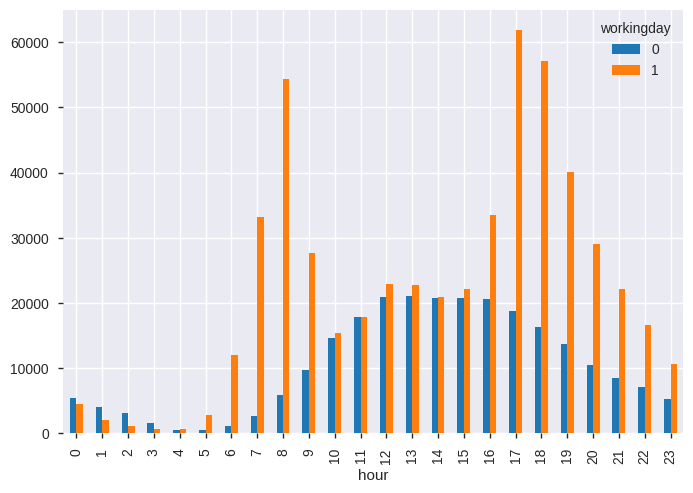

In [22]:
by_hour.plot(kind="bar")

In [23]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [24]:
data=train.copy()

In [25]:
data["month"]= data.datetime.dt.month
data["year"]= data.datetime.dt.year

In [26]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,2011


In [27]:
x =data.groupby(["month","year"])["count"].sum().unstack()

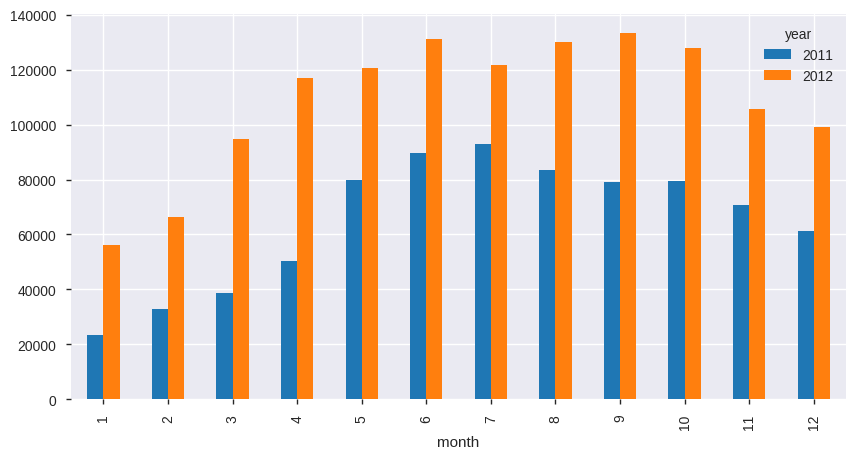

In [28]:
x.plot(kind="bar",figsize=(10,5))

In [29]:
def plot_by_month(train):
  data=train.copy()
  data["month"]= data.datetime.dt.month
  data["year"]= data.datetime.dt.year
  x =data.groupby(["month","year"])["count"].sum().unstack()
  x.plot(kind="bar",figsize=(10,5))


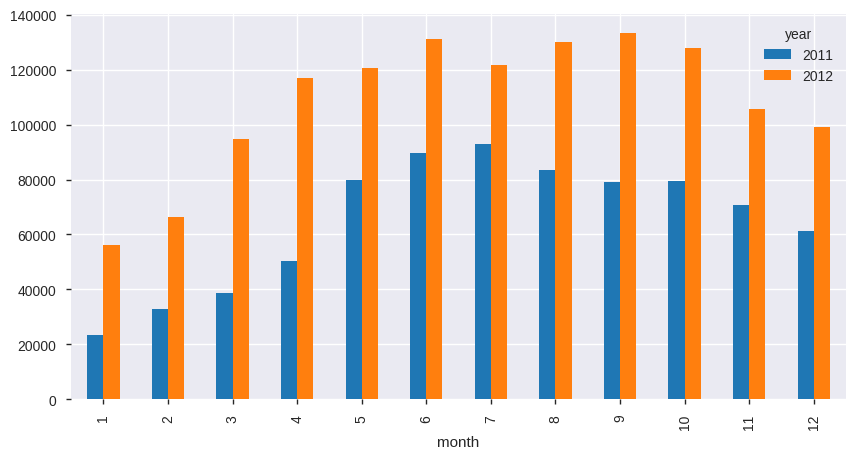

In [30]:
plot_by_month(train)

In [31]:
def plot_by_hour(train):
  data=train.copy()
  data["hour"]= data.datetime.dt.hour
  data["year"]= data.datetime.dt.year
  x =data.groupby(["hour","year"])["count"].sum().unstack()
  x.plot(kind="bar",figsize=(10,5))

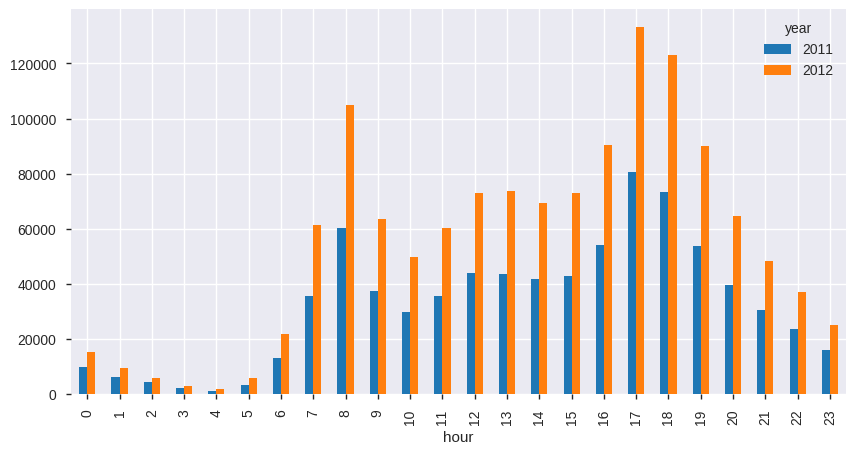

In [32]:
plot_by_hour(train)

In [33]:
data["hour"]= data.datetime.dt.hour

In [34]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,year,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,2011,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,2011,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2011,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,2011,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,2011,4


In [35]:
data.sort_values("count",ascending=False)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,year,hour
9345,2012-09-12 18:00:00,3,0,1,1,27.06,31.060,44,16.9979,91,886,977,9,2012,18
9320,2012-09-11 17:00:00,3,0,1,1,28.70,31.820,28,0.0000,168,802,970,9,2012,17
9297,2012-09-10 18:00:00,3,0,1,1,25.42,31.060,35,19.9995,111,857,968,9,2012,18
9752,2012-10-10 17:00:00,4,0,1,1,23.78,27.275,43,15.0013,91,857,948,10,2012,17
9896,2012-10-16 17:00:00,4,0,1,1,21.32,25.000,39,12.9980,104,839,943,10,2012,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,2011-03-02 04:00:00,1,0,1,1,8.20,10.605,75,8.9981,1,0,1,3,2011,4
1853,2011-05-04 03:00:00,2,0,1,3,17.22,21.210,88,35.0008,0,1,1,5,2011,3
1589,2011-04-12 03:00:00,2,0,1,2,23.78,27.275,56,8.9981,0,1,1,4,2011,3
693,2011-02-12 05:00:00,1,0,0,1,4.92,8.335,74,6.0032,0,1,1,2,2011,5


Now lets try to plot the distribution of count of each hour

In [36]:
df = data.copy()

for year 2012

In [37]:
df_12 = df[df["year"]==2012]
x ={}

In [38]:
for i in range(0,24):
  x[i] = df_12[df_12.hour==i]["count"].values

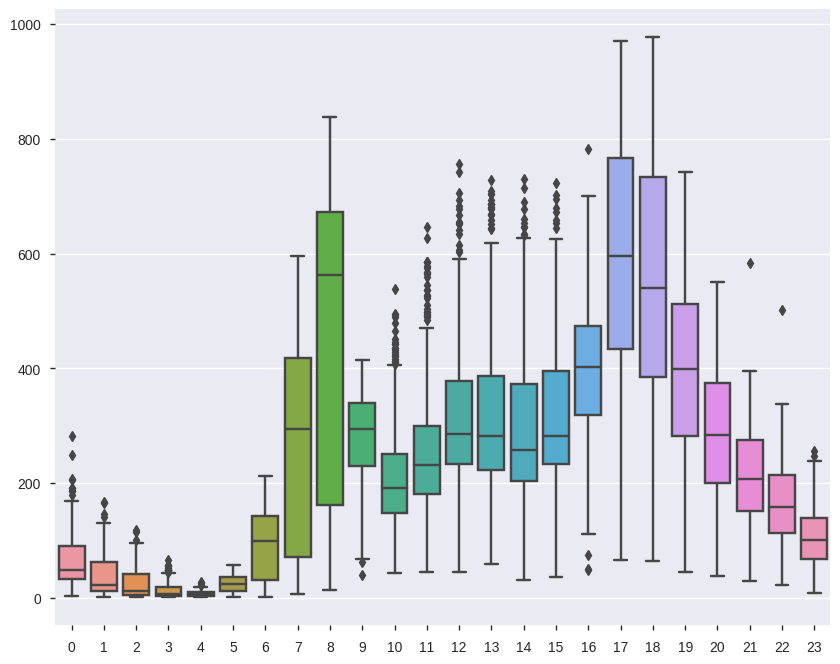

In [39]:
plt.figure(figsize=(10,8))
sns.boxplot(data = [x[i] for i in range(0,24)])

In [40]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [41]:
train["datetime"]= pd.to_datetime(train["datetime"])

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [43]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour

In [44]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [45]:
test["datetime"]= pd.to_datetime(test["datetime"])

In [46]:

test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour

In [47]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4


In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
dtypes: datetime64[ns](1), 

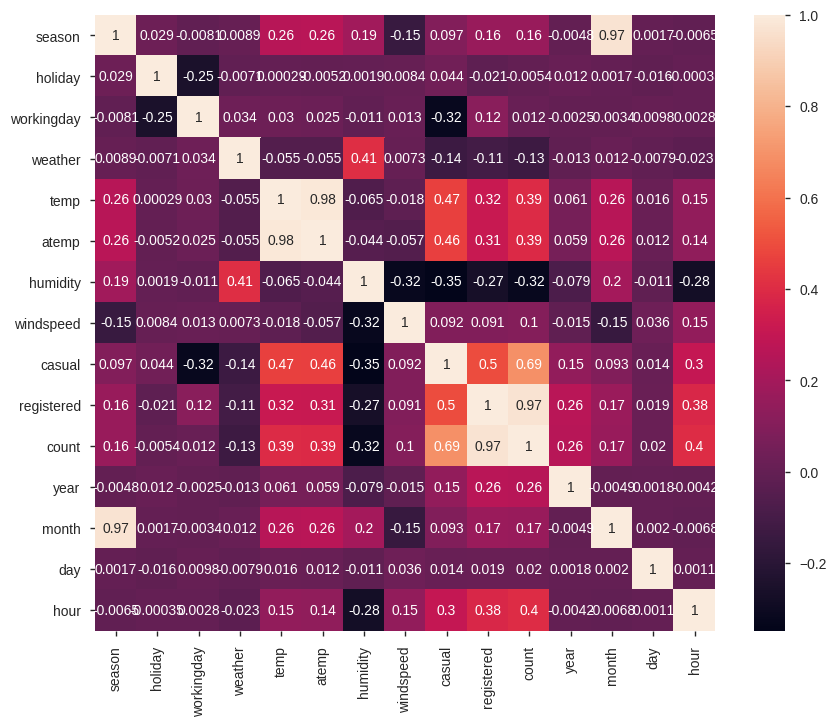

In [49]:
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(),annot=True)

In [50]:
train.drop("datetime",axis=1,inplace=True)
test.drop("datetime",axis=1,inplace=True)

Since atemp and temp are highly correlated,lets remove atemp in both train and test set

In [51]:
train.drop("atemp",axis=1,inplace=True)
test.drop("atemp",axis=1,inplace=True)

In [52]:
train.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,1,0,0,1,9.84,81,0.0,3,13,16,2011,1,1,0
1,1,0,0,1,9.02,80,0.0,8,32,40,2011,1,1,1
2,1,0,0,1,9.02,80,0.0,5,27,32,2011,1,1,2
3,1,0,0,1,9.84,75,0.0,3,10,13,2011,1,1,3
4,1,0,0,1,9.84,75,0.0,0,1,1,2011,1,1,4


In [53]:
test.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,year,month,day,hour
0,1,0,1,1,10.66,56,26.0027,2011,1,20,0
1,1,0,1,1,10.66,56,0.0000,2011,1,20,1
2,1,0,1,1,10.66,56,0.0000,2011,1,20,2
3,1,0,1,1,10.66,56,11.0014,2011,1,20,3
4,1,0,1,1,10.66,56,11.0014,2011,1,20,4


we should drop casual,registered and count in train

In [54]:
X_train = train.drop(["casual","registered","count"],axis=1)
y_train = train["count"]

In [55]:
X_train.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,year,month,day,hour
0,1,0,0,1,9.84,81,0.0,2011,1,1,0
1,1,0,0,1,9.02,80,0.0,2011,1,1,1
2,1,0,0,1,9.02,80,0.0,2011,1,1,2
3,1,0,0,1,9.84,75,0.0,2011,1,1,3
4,1,0,0,1,9.84,75,0.0,2011,1,1,4


In [56]:
y_train.head()

0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_main,X_val,y_main,y_val = train_test_split(X_train,y_train,random_state=355,test_size=0.2,stratify=X_train["holiday"])

In [59]:
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
sc_y = MinMaxScaler()
X_main = sc_X.fit_transform(X_main)
X_val = sc_X.fit_transform(X_val)
y_main = sc_y.fit_transform(pd.DataFrame(y_main))
y_val = sc_y.fit_transform(pd.DataFrame(y_val))

We cannot use linear regression because there is no linear relation and so it gives very very bad prediction

In [60]:
from sklearn.metrics import mean_squared_log_error,mean_squared_error

In [61]:
X_main

array([[0.66666667, 0.        , 1.        , ..., 0.54545455, 0.5       ,
        0.04347826],
       [0.33333333, 0.        , 0.        , ..., 0.45454545, 0.44444444,
        0.56521739],
       [0.33333333, 0.        , 1.        , ..., 0.45454545, 0.44444444,
        0.82608696],
       ...,
       [0.33333333, 0.        , 1.        , ..., 0.27272727, 0.61111111,
        0.26086957],
       [0.33333333, 0.        , 1.        , ..., 0.45454545, 0.72222222,
        0.73913043],
       [0.        , 0.        , 1.        , ..., 0.18181818, 0.27777778,
        0.60869565]])

In [62]:
from sklearn.tree import DecisionTreeRegressor

In [63]:
dtree = DecisionTreeRegressor()

In [64]:
dtree_model = dtree.fit(X_main,y_main)
dtree_model.score(X_main,y_main)

0.9999999967485189

In [65]:
dtree_model.score(X_val,y_val)

0.8754967691809822

In [66]:
dt_prediction = dtree_model.predict(X_val)

In [67]:
mean_squared_error(y_val, dt_prediction)

0.004775866434028201

In [68]:
mean_squared_log_error(y_val,dt_prediction)

0.002701755372937591

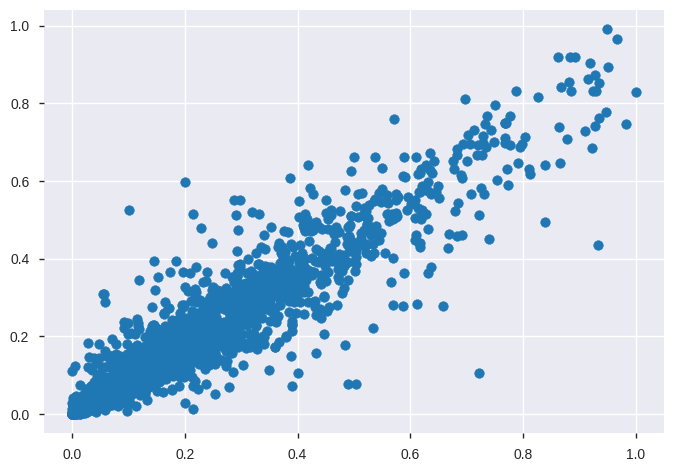

In [69]:
plt.scatter(y_val,dt_prediction)

In [72]:
mean_squared_error(y_main,dtree_model.predict(X_main))

1.1251714941384508e-10

In [78]:
test_scaled = sc_X.fit_transform(test)
test_scaled

array([[0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.04347826],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.08695652],
       ...,
       [0.        , 0.        , 1.        , ..., 1.        , 1.        ,
        0.91304348],
       [0.        , 0.        , 1.        , ..., 1.        , 1.        ,
        0.95652174],
       [0.        , 0.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])

In [80]:
test_pred_scaled = dtree_model.predict(test_scaled)

In [82]:
test_pred = sc_y.inverse_transform(test_pred_scaled.reshape(-1,1))

In [83]:
test_pred

array([[ 7.56967213],
       [ 5.69262295],
       [ 1.        ],
       ...,
       [33.84836066],
       [33.84836066],
       [33.84836066]])

In [86]:
df_count=pd.DataFrame(test_pred,columns=["count"])
df_count

,count
0,7.569672
1,5.692623
2,1.000000
3,1.000000
4,1.938525
...,...
6488,219.676230
6489,179.319672
6490,33.848361
6491,33.848361


In [87]:
test1 = pd.read_csv("test.csv")

In [89]:
result_df = pd.concat([test1[["datetime"]],df_count],axis=1) 

In [91]:
result_df['count'] = result_df['count'].astype('int')

In [92]:
result_df.to_csv('mycsvfile.csv',index=False)

In [73]:
X_train.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,year,month,day,hour
0,1,0,0,1,9.84,81,0.0,2011,1,1,0
1,1,0,0,1,9.02,80,0.0,2011,1,1,1
2,1,0,0,1,9.02,80,0.0,2011,1,1,2
3,1,0,0,1,9.84,75,0.0,2011,1,1,3
4,1,0,0,1,9.84,75,0.0,2011,1,1,4


In [75]:
test.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,year,month,day,hour
0,1,0,1,1,10.66,56,26.0027,2011,1,20,0
1,1,0,1,1,10.66,56,0.0000,2011,1,20,1
2,1,0,1,1,10.66,56,0.0000,2011,1,20,2
3,1,0,1,1,10.66,56,11.0014,2011,1,20,3
4,1,0,1,1,10.66,56,11.0014,2011,1,20,4
